In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from  os import makedirs

from deep_models.model.dichot_gauss import DichotGauss, make_symmetric, cov_to_corr
from deep_models.util.optimize.dichot_gauss import DGOptimise

import yaml

In [2]:
timebins = 1000
trials = 100
num_neur = 10

In [3]:
# Generate random mean and correlation matrix
mean = np.random.random((timebins, num_neur))
corr = cov_to_corr(make_symmetric(np.random.random((num_neur, num_neur))) + np.eye(num_neur))

In [4]:
# Sample from DG model
dg = DichotGauss(num_neur, mean=mean, corr=corr, make_pd=True)
y = dg.sample(repeats=trials)

/home/poornima/Documents/deepvision_project/code/robust_vision/deep_models/model/dichot_gauss.py:168: WarningDG: Input covariance matrix is not positive definite. Doing Higham correction.
  warnings.warn('Input covariance matrix is not positive definite. Doing Higham correction.', WarningDG)


Frobenius norm: 0.9669627166096861 0.793970871977806 0.25025729075159225


/home/poornima/Documents/deepvision_project/code/robust_vision/deep_models/model/dichot_gauss.py:82: WarningDG: Iteration limit reached without convergence.
  warnings.warn("Iteration limit reached without convergence.", WarningDG)
/home/poornima/Documents/deepvision_project/code/robust_vision/deep_models/model/dichot_gauss.py:88: WarningDG: Higham corrected matrix was not positive definite. Converting into pd matrix.
  WarningDG)


ValueError: the input matrix must be positive semidefinite

In [7]:
dg.corr

array([[ 1.        ,  1.03125227,  0.82096418,  0.60631388,  0.72713508,
         0.79284546,  0.54664795,  0.24404871,  0.62581509,  0.62870803],
       [ 1.03125227,  1.        ,  1.41303239,  0.55774919,  0.43048228,
         0.97619127,  0.40268173,  0.28712972,  0.49017283,  0.77243128],
       [ 0.82096418,  1.41303239,  1.        ,  0.8688096 ,  0.91578084,
         0.67124667,  0.2170575 ,  0.25181604,  0.73188191,  0.84588507],
       [ 0.60631388,  0.55774919,  0.8688096 ,  1.        ,  0.59236812,
         0.49508711,  0.22082044, -0.1820492 ,  0.16102491,  0.36346795],
       [ 0.72713508,  0.43048228,  0.91578084,  0.59236812,  1.        ,
         0.50801815,  0.87784414,  0.50710148,  0.55636931,  0.47288451],
       [ 0.79284546,  0.97619127,  0.67124667,  0.49508711,  0.50801815,
         1.        ,  0.57161352,  0.03607798,  0.43094207,  0.66780648],
       [ 0.54664795,  0.40268173,  0.2170575 ,  0.22082044,  0.87784414,
         0.57161352,  1.        ,  0.33101336

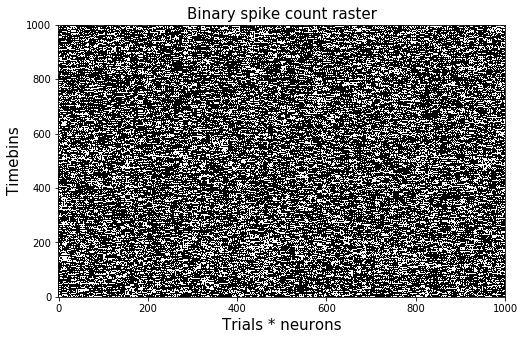

In [5]:
# Visualise y
plt.subplots(figsize=(8, 5))
plt.imshow(y.reshape(timebins, -1), aspect='auto', origin='lower', cmap='binary')
plt.title('Binary spike count raster', fontsize=15)
plt.xlabel('Trials * neurons', fontsize=15)
plt.ylabel('Timebins', fontsize=15)
plt.show()

In [6]:
# Do optimisation
dgopt = DGOptimise(data=y)    # Initialise optimiser

cov_y = dgopt.data_covariance    # Covariance of data
mean_hat = dgopt.gauss_mean    # Estimate of mean of multivariate Gaussian from data

corr_hat = dgopt.get_gauss_correlation(set_attr=True)    # Estimate of multivaraiate Gaussian correlation matrix

0.278323251285553


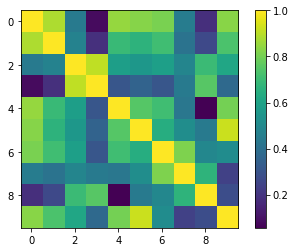

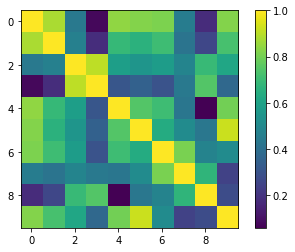

In [7]:
plt.imshow(corr_hat)
plt.colorbar()
plt.show()
plt.imshow(dg.corr)
plt.colorbar()

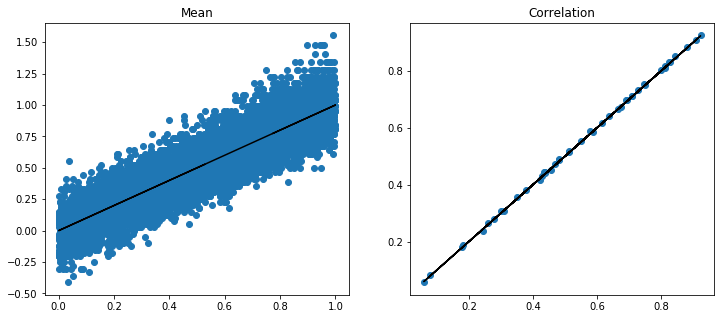

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_title('Mean')
ax1.plot(mean.flatten(), mean_hat.flatten(), 'o')
ax1.plot(mean.flatten(), mean.flatten(), 'k')

ax2.set_title('Correlation')
ax2.plot(dg.corr[dgopt.tril_inds], corr_hat[dgopt.tril_inds], 'o')
ax2.plot(dg.corr[dgopt.tril_inds], dg.corr[dgopt.tril_inds], 'k')